### Real Zeros of Polynomials

In [194]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# initiate pretty print
sp.init_printing()

# define parameter
t = sp.Symbol('t')

Define polynomial

In [195]:
my_polynomial = t**2 - 1 + 3*t**3 - 2*t**4
my_polynomial

Check: find roots (solve p for t), and plot it

In [196]:
# define Sympy polynomial object 
p = sp.Poly(my_polynomial, t, domain='RR')

# get roots of p for t
roots = sp.solve(p, t)
roots

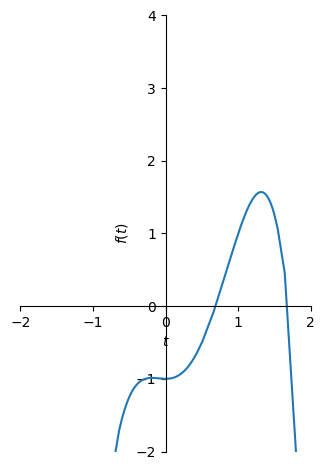

In [197]:
ax = sp.plot(my_polynomial, xlim=(-2, 2), ylim=(-2,4), aspect_ratio=(1,1))

Prepare polynomial, companion matrix, newton sums, Hankel matrix

In [198]:
# get coefficients and degree of polynomial
coeffs = p.all_coeffs()
deg = p.degree()
coeffs

In [199]:
# companion matrix
companion_matrix = sp.zeros(deg)
for i in range(deg - 1):
    companion_matrix[i + 1, i] = 1
for i in range(deg):
    companion_matrix[i, -1] = -1 * coeffs[::-1][i]

companion_matrix



⎡0  0  0  1.0 ⎤
⎢             ⎥
⎢1  0  0   0  ⎥
⎢             ⎥
⎢0  1  0  -1.0⎥
⎢             ⎥
⎣0  0  1  -3.0⎦

In [200]:
# newton sums
# k-th newton sum is the trace of the k-th power of the companion matrix
newton_sums = []
for k in range(2*deg - 1):
    newton_sum_k = companion_matrix ** k
    newton_sums.append(newton_sum_k.trace())

newton_sums

In [201]:
# construct the Hankel matrix
hermite_matrix = sp.zeros(deg)
for i in range(deg):
    for j in range(deg):
        hermite_matrix[i, j] = newton_sums[i+j]

hermite_matrix


⎡  4    -3.0    7.0    -18.0 ⎤
⎢                            ⎥
⎢-3.0    7.0   -18.0    51.0 ⎥
⎢                            ⎥
⎢ 7.0   -18.0   51.0   -138.0⎥
⎢                            ⎥
⎣-18.0  51.0   -138.0  370.0 ⎦

In [202]:
# construct the Hermite matrix using numpy
hermite_matrix_np = np.zeros((deg, deg))
for i in range(deg):
    for j in range(deg):
        hermite_matrix_np[i, j] = newton_sums[i+j]


In [203]:
def symmetric_gaussian_elimination(A):
    n = len(A)

    # Create an identity matrix
    I = np.eye(n)

    # Create a copy of A to avoid modifying the original matrix
    Ab = np.copy(A)

    # Perform forward elimination without normalizing rows
    for i in range(n):
        # Eliminate other rows
        for j in range(i + 1, n):
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, :] -= factor * Ab[i, :]
            Ab[:, j] -= factor * Ab[i, :]

    # Perform back-substitution
    for i in range(n - 1, -1, -1):
        for j in range(i - 1, -1, -1):
            factor = Ab[j, i]
            Ab[j, :] -= factor * Ab[i, :]
            Ab[:, j] -= factor * Ab[i, :]

    return Ab


D = symmetric_gaussian_elimination(hermite_matrix_np)
diag = np.diag(D)
print(D)



[[   4.            0.            0.            0.        ]
 [   0.            2.5           0.            0.        ]
 [   0.            0.         -103.55          0.        ]
 [   0.            0.            0.         -778.27353935]]


In [204]:
# Count the positive and negative elements of D
positive_elements = sum(1 for val in diag if val > 0)
negative_elements = sum(1 for val in diag if val < 0)
sign = positive_elements - negative_elements
sign

In [205]:
# alternative approach, just calculate the eigenvalues of the Hankel matrix
eigenvalues_dict = hermite_matrix.eigenvals()
# covert the output dictionary with multiplicities to a list of eigenvalues
eigenvalues = [key for key, value in eigenvalues_dict.items() for _ in range(value)]
eigenvalues

Rank of the matrix:

In [206]:
# calculate the rank of the Hankel matrix
rank = hermite_matrix.rank()
rank

Signature of the matrix:

In [207]:
# Count the positive and negative elements of the diagonal of the Hankel matrix
positive_eigenvalues = sum(1 for eigenvalue in eigenvalues if eigenvalue > 0)
negative_eigenvalues = sum(1 for eigenvalue in eigenvalues if eigenvalue < 0)

# Calculate the signature
signature = positive_eigenvalues - negative_eigenvalues
signature

Roots again:

In [208]:
print('------------')
print('------------')
print(f"Rank: {rank}")
print(f"Sign: {sign}")
print(f"Sign: {signature} (using eigenvals)")
print(f'Roots: {roots}')
print('------------')

------------
------------
Rank: 4
Sign: 0
Sign: 2 (using eigenvals)
Roots: [0.687268267771122, 1.69228948072627, -0.439778874248698 - 0.48630868537012*I, -0.439778874248698 + 0.48630868537012*I]
------------
